In [240]:
# 데이터 활용 도구들
import numpy as np
import pandas as pd


In [241]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [242]:
#훈련데이터와 성능 확인 데이터 확인
train_df = pd.read_csv("/Users/bagdeoggeun/File/Dataset/titanic/train.csv")
test_df = pd.read_csv("/Users/bagdeoggeun/File/Dataset/titanic/test.csv")

In [243]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [244]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [245]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [246]:
train_df[['Pclass','Survived']].groupby(['Pclass'] , as_index=False).mean().sort_values(by = 'Survived')
#as_index: groupby로 묶은 column을 인덱스로 사용할 것인지 사용하지 않을 것인지 


,Pclass,Survived
2,3,0.242363
1,2,0.472826
0,1,0.629630


In [247]:
train_df[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by = 'Survived')

,Sex,Survived
1,male,0.188908
0,female,0.742038


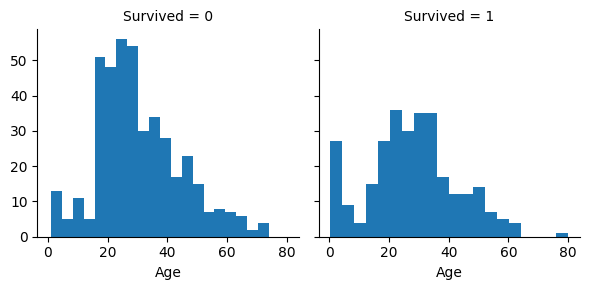

In [248]:
g = sns.FacetGrid(train_df,col='Survived')
g.map(plt.hist,'Age',bins=20)

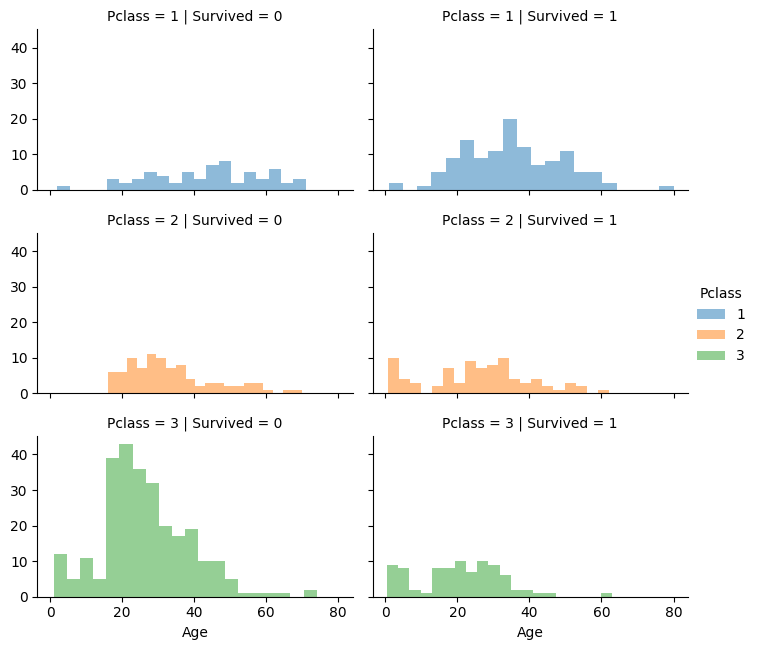

In [249]:
grid = sns.FacetGrid(train_df,col='Survived',row="Pclass",hue="Pclass",height=2.2,aspect=1.6)
grid.map(plt.hist,'Age',alpha=.5,bins=20)
grid.add_legend()

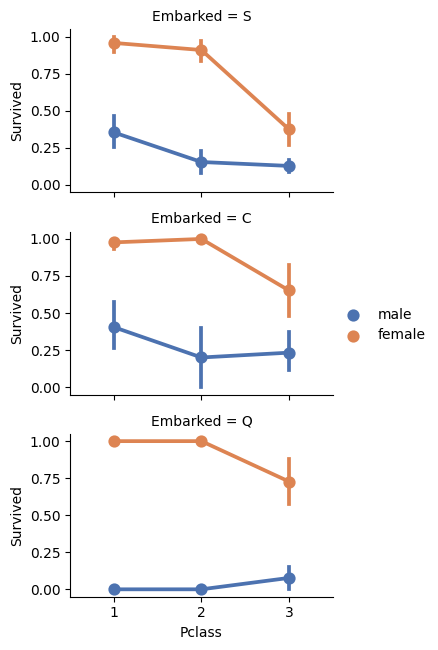

In [250]:
grid = sns.FacetGrid(train_df,row='Embarked',height=2.2,aspect=1.6)

grid.map(sns.pointplot,'Pclass','Survived','Sex',palette = 'deep',order = [1,2,3],hue_order = ["male","female"])

grid.add_legend()

In [251]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


# 승선지와 생존여부, 성별에 따른 요금(Fare)


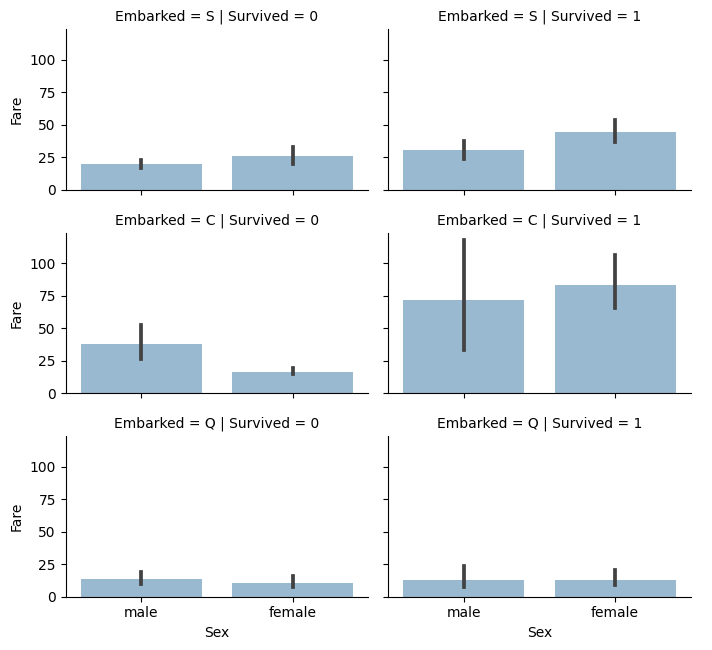

In [252]:
grid = sns.FacetGrid(train_df,row='Embarked',col='Survived',height=2.2,aspect=1.6)

grid.map(sns.barplot,'Sex','Fare',alpha=.5,order=["male","female"])

grid.add_legend()

## 데이터 전처리

In [253]:
combine = [train_df,test_df]

for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])


Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [254]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare')
    dataset['Title'] = dataset['Title'].replace('Mile','Miss')
    dataset['Title'] = dataset['Title'].replace('Ms','Miss')
    dataset['Title'] = dataset['Title'].replace('Mme','Mrs')

train_df[['Title','Survived']].groupby(['Title'],as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.699454
2,Mlle,1.000000
3,Mr,0.156673
4,Mrs,0.793651
5,Rare,0.347826


In [255]:
title_mapping = {"Mr":1,'Miss':2,"Mrs":3,"Master":4,"Rare":5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0


In [256]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    dataset['Embarked'] = dataset['Embarked'].astype(str)


In [257]:
for dataset in combine:
    dataset['Age'].fillna(dataset['Age'].mean(),inplace=True)
    dataset['Age'] = dataset['Age'].astype(int)
    train_df['AgeGroup']=pd.cut(train_df['Age'],5)
print(train_df[['AgeGroup','Survived']].groupby(['AgeGroup'],as_index=False).mean())

        AgeGroup  Survived
0  (-0.08, 16.0]  0.550000
1   (16.0, 32.0]  0.344762
2   (32.0, 48.0]  0.403226
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


In [258]:
for dataset in combine:
    dataset.loc[dataset['Age'] <= 16,'Age'] = 0
    dataset.loc[(dataset['Age'] >= 16) & (dataset['Age']<=32),'Age'] = 1
    dataset.loc[(dataset['Age'] >= 32) & (dataset['Age']<=48),'Age'] = 2
    dataset.loc[(dataset['Age'] >= 48) & (dataset['Age']<=64),'Age'] = 3
    dataset.loc[dataset['Age'] >= 64,'Age'] = 4

    dataset['Age'] = dataset['Age'].map({0:'Child',1:'Young',2:'Middle',3:'Prime',4:'Old'}).astype(str)
    


In [259]:
for dataset in combine:
    dataset['Fare'] = dataset['Fare'].fillna(dataset['Fare'].mean())

In [260]:
print(train_df[['Pclass','Fare']].groupby(['Pclass'],as_index=False).mean())

   Pclass       Fare
0       1  84.154687
1       2  20.662183
2       3  13.675550


In [261]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Title            0
dtype: int64

In [262]:
test_df.dropna()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,Young,1,0,21228,82.2667,B45,S,3
14,906,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,Middle,1,0,W.E.P. 5734,61.1750,E31,S,3
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,Middle,1,3,PC 17608,262.3750,B57 B59 B63 B66,C,3
26,918,1,"Ostby, Miss. Helene Ragnhild",female,Young,0,1,113509,61.9792,B36,C,2
28,920,1,"Brady, Mr. John Bertram",male,Middle,0,0,113054,30.5000,A21,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
404,1296,1,"Frauenthal, Mr. Isaac Gerald",male,Middle,1,0,17765,27.7208,D40,C,1
405,1297,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,Young,0,0,SC/PARIS 2166,13.8625,D38,C,1
407,1299,1,"Widener, Mr. George Dunton",male,Prime,1,1,113503,211.5000,C80,C,1
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,Middle,1,0,19928,90.0000,C78,Q,3


In [263]:
for dataset in combine:
    dataset['Familly'] = dataset['SibSp'] + dataset['Parch']
    dataset['Familly'] = dataset['Familly'].astype(int)

In [264]:
train_df.head()
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Familly
0,892,3,"Kelly, Mr. James",male,Middle,0,0,330911,7.8292,NaN,Q,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,Middle,1,0,363272,7.0000,NaN,S,3,1
2,894,2,"Myles, Mr. Thomas Francis",male,Prime,0,0,240276,9.6875,NaN,Q,1,0
3,895,3,"Wirz, Mr. Albert",male,Young,0,0,315154,8.6625,NaN,S,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,Young,1,1,3101298,12.2875,NaN,S,3,2


In [265]:
features_drop = ['Name', 'Ticket', 'Cabin', 'SibSp', 'Parch']
train = train_df.drop(features_drop, axis=1)
test = test_df.drop(features_drop, axis=1)
train = train.drop(['PassengerId','AgeGroup'], axis=1)

In [266]:
print(train.head())
print(test.head())

   Survived  Pclass     Sex     Age     Fare Embarked  Title  Familly
0         0       3    male   Young   7.2500        S    1.0        1
1         1       1  female  Middle  71.2833        C    3.0        1
2         1       3  female   Young   7.9250        S    2.0        0
3         1       1  female  Middle  53.1000        S    3.0        1
4         0       3    male  Middle   8.0500        S    1.0        0
   PassengerId  Pclass     Sex     Age     Fare Embarked  Title  Familly
0          892       3    male  Middle   7.8292        Q      1        0
1          893       3  female  Middle   7.0000        S      3        1
2          894       2    male   Prime   9.6875        Q      1        0
3          895       3    male   Young   8.6625        S      1        0
4          896       3  female   Young  12.2875        S      3        2


In [267]:
train_df=pd.get_dummies(train)
test_df=pd.get_dummies(test)

train_df_label = train_df['Survived']
train_df_data = train_df.drop('Survived',axis=1)
test_data = test_df.drop("PassengerId",axis =1).copy()

In [268]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.utils import shuffle


In [269]:
train_df_data,train_df_label = shuffle(train_df_data,train_df_label,random_state=5)

In [270]:
def train(model):
    model.fit(train_df_data,train_df_label)
    prediction = model.predict(test_data)
    accuracy = round(model.score(train_df_data,train_df_label)*100,2)
    print("Accuracy:",accuracy,"%")
    return prediction

In [271]:
test_data=test_data.dropna()
test_data.isna().sum()

Pclass        0
Fare          0
Title         0
Familly       0
Sex_female    0
Sex_male      0
Age_Child     0
Age_Middle    0
Age_Old       0
Age_Prime     0
Age_Young     0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [272]:
test_df = test_df.dropna()
test = test.dropna()

In [273]:
log=LogisticRegression().fit(train_df_data,train_df_label)
log_pred = log.predict(test_data)
log_acc = round(log.score(train_df_data,train_df_label)*100,2)
print(log_acc,"%")

81.37 %


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [274]:
svc=SVC().fit(train_df_data,train_df_label)
svc_pred = svc.predict(test_data)
svc_acc = round(svc.score(train_df_data,train_df_label)*100,2)
print(svc_acc)

69.14


In [275]:
KNN=KNeighborsClassifier().fit(train_df_data,train_df_label)
KNN_pred = KNN.predict(test_data)
KNN_acc = round(KNN.score(train_df_data,train_df_label)*100,2)
print(KNN_acc)

85.97


In [276]:
Rforest=RandomForestClassifier().fit(train_df_data,train_df_label)
Rforest_pred = Rforest.predict(test_data)
Rforest_acc = round(Rforest.score(train_df_data,train_df_label)*100,2)
print(Rforest_acc)


94.5


In [280]:
Gaussian=GaussianNB().fit(train_df_data,train_df_label)
Gaussian_pred = Gaussian.predict(test_data)
Gaussian_acc = round(Gaussian.score(train_df_data,train_df_label)*100,2)
print(Gaussian_acc)

79.57


In [283]:

test_data = test_df.drop("PassengerId", axis=1).copy()


In [278]:

prediction = Rforest.predict(test_data)

In [279]:
submission = pd.DataFrame({
    "PassengerId" : test["PassengerId"],
    "Survived": prediction

})

submission.to_csv('submission.csv',index=False)